23.08.2022г.

ДЗ урок 6. Обучение без учителя в Scikit-learn.

Тамбовцев Р.

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [24]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InLineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

bhpd = load_boston()
bhpd.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
data = bhpd['data']
data.shape

(506, 13)

In [4]:
# названия признаков по ключу "feature_names"
feature_names = bhpd["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# Создадим dataframe с признаками X
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# info of table
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
# Пустых значений нет

In [8]:
# Массив с целевыми значениями 'target'

target = bhpd['target']

target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [9]:
# Создадим dataframe с целевыми значенияи 'y'
y = pd.DataFrame(target, columns=['Price'])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [10]:
# Разбиваем выборку на тестовую и тренировочную
# с размером тестовой выборки 30% и параметорм random_state = 42

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=142)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\{}'.format(X_train_scaled.shape))
print('После:\{}'.format(X_train_tsne.shape))

До:\(404, 13)
После:\(404, 2)


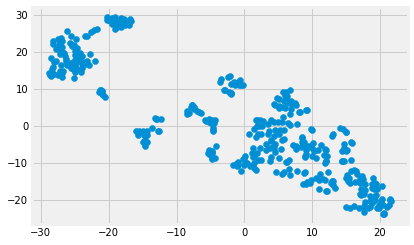

In [31]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2. Кластеризация

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [32]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

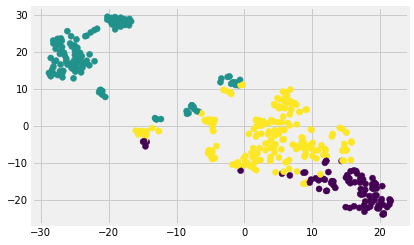

In [67]:
labels_train = model.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [86]:
# постчитаем средние значения price и Crime в каждом кластере

print('Кластер 0 - mean price = {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1 - mean price = {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2 - mean price = {}'.format(y_train[labels_train == 2].mean()))
print()

print('Кластер 0 - mean CRIM = {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1 - mean CRIM = {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2 - mean CRIM = {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


Кластер 0 - mean price = Price    27.788372
dtype: float64
Кластер 1 - mean price = Price    16.165354
dtype: float64
Кластер 2 - mean price = Price    24.958115
dtype: float64

Кластер 0 - mean CRIM = 0.07356558139534886
Кластер 1 - mean CRIM = 10.797028425196853
Кластер 2 - mean CRIM = 0.42166020942408367


### Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

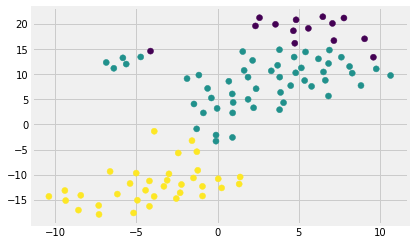

In [85]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

labels_test = model.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [94]:
# постчитаем средние значения price и Crime в каждом кластере
# постчитаем средние значения price и Crime в каждом кластере

print('mean price(кл 0) = {}'.format(y_test.loc[labels_test == 0, "Price"].mean()))
print('mean price(кл 1) = {}'.format(y_test.loc[labels_test == 1, "Price"].mean()))
print('mean price(кл 2) = {}'.format(y_test.loc[labels_test == 2, "Price"].mean()))
print()

print('mean CRIM(кл 0) = {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('mean CRIM(кл 1) = {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('mean CRIM(кл 2) = {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

mean price(кл 0) = 33.871428571428574
mean price(кл 1) = 21.552830188679245
mean price(кл 2) = 16.437142857142856

mean CRIM(кл 0) = 0.08618571428571427
mean CRIM(кл 1) = 0.25200716981132076
mean CRIM(кл 2) = 10.165531142857143


In [95]:
# Из полученных данных можно сделать вывод, что средняя цена коррелируется со средним значением CRIM.
# чем ниже величина CRIM, тем выше цена.